In [23]:
import pandas as pd

# Read the concatenated data file
#concatenated_data = pd.read_csv('concatenated_data_2002_to_2023_with_stations.csv')
concatenated_data = pd.read_csv('aaa.csv')

# Create a DataFrame specifically for baseline year
by=2009
baseline = concatenated_data[concatenated_data['LST_DATE'].astype(str).str[:4] == str(by)]
baseline = baseline[['WBANNO', 'LST_DATE', 'T_DAILY_MEAN','LATITUDE','LONGITUDE']]
baseline.columns = ['WBANNO', 'Date', 'T_DAILY_MEAN_baseline','LATITUDE','LONGITUDE']
baseline['Month_Day'] = baseline['Date'].astype(str).str[4:]  # Extract month and day only

# Extract month and day from LST_DATE for the main dataset
concatenated_data['Month_Day'] = concatenated_data['LST_DATE'].astype(str).str[4:]

# Merge basline data with the rest of the dataset based on station, month, and day
merged_data = concatenated_data.merge(baseline, on=['WBANNO', 'Month_Day','LATITUDE','LONGITUDE'], how='inner')

# Calculate temperature anomalies by subtracting baseline temperature from other years
merged_data['Temperature_Anomaly'] = merged_data['T_DAILY_MEAN'] - merged_data['T_DAILY_MEAN_baseline']

#Filter out rows where anomaly is -9999
merged_data = merged_data[merged_data['T_DAILY_MEAN'] != -9999]
merged_data = merged_data[merged_data['T_DAILY_MEAN_baseline'] != -9999]

# Display the merged data or perform subsequent operations
#print("merged done")

import geopandas as gpd
from shapely.geometry import Point

# Load the state shapefile
states = gpd.read_file('Downloads/States_shapefile-shp/states_shapefile.shp')

# Assuming merged_data has 'LONGITUDE' and 'LATITUDE' columns
merged_data['geometry'] = [Point(xy) for xy in zip(merged_data['LONGITUDE'], merged_data['LATITUDE'])]
gdf = gpd.GeoDataFrame(merged_data, geometry='geometry')

# Set CRS for the GeoDataFrame
gdf.crs = "EPSG:4326"

# Perform a spatial join to associate points with states
merged_with_states = gpd.sjoin(gdf, states[['State_Name', 'State_Code', 'geometry']], how='left', op='within')


# Read the contents of the file into a DataFrame
with open('DNCGOP.txt', 'r') as file:
    lines = file.readlines()

# Process the lines to create a DataFrame
data = [line.strip().split(',') for line in lines[1:]]
df_political_affiliation = pd.DataFrame(data, columns=['State_Name', 'Red or Blue'])

# Left join to add political affiliation based on State_Name
merged_with_states_affiliation = pd.merge(
    merged_with_states,
    df_political_affiliation,
    on='State_Name',
    how='left'
)

# Write the resulting DataFrame to a CSV file
merged_with_states_affiliation.to_csv('merged_data_with_states_affiliation_2009.csv', index=False)

C:\Users\Administrator\miniconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


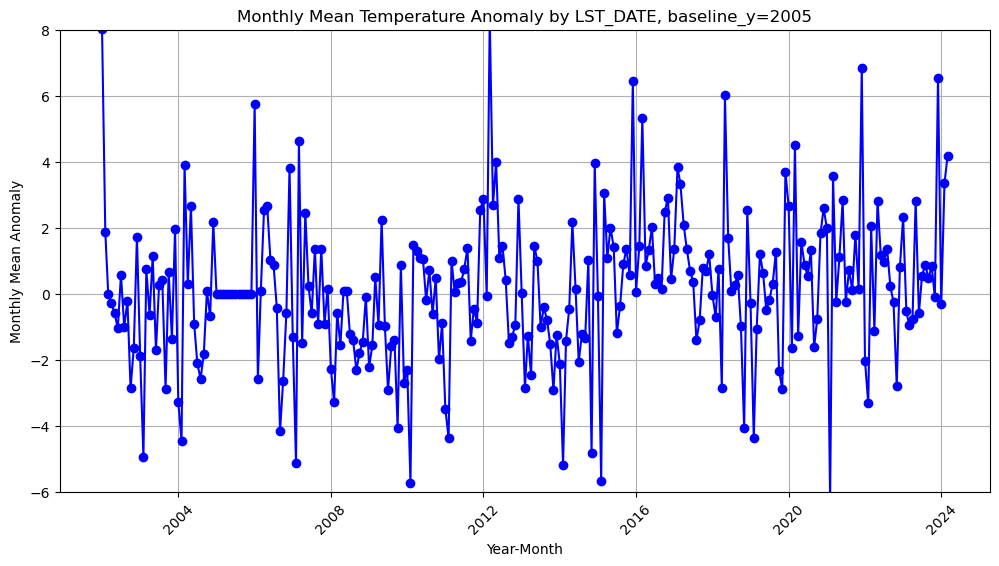

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have 'merged_data' DataFrame with 'Temperature_Anomaly' column calculated as the temperature anomaly

# Convert 'LST_DATE' column to datetime format
merged_data['LST_DATE'] = pd.to_datetime(merged_data['LST_DATE'], format='%Y%m%d')

# Monthly anomaly by LST_DATE
monthly_anomaly = merged_data.groupby([merged_data['LST_DATE'].dt.year, merged_data['LST_DATE'].dt.month])['Temperature_Anomaly'].mean()

# Create a new index combining year and month
monthly_anomaly.index = pd.to_datetime(monthly_anomaly.index.map(lambda x: '-'.join(map(str, x))), format='%Y-%m')

# Plotting monthly anomaly as a continuous line
plt.figure(figsize=(12, 6))
plt.plot(monthly_anomaly.index, monthly_anomaly.values*1.8, marker='o', linestyle='-', color='blue')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Mean Anomaly')
plt.title('Monthly Mean Temperature Anomaly by LST_DATE, baseline_y='+str(by))
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True)
plt.ylim(-6, 8)
plt.show()


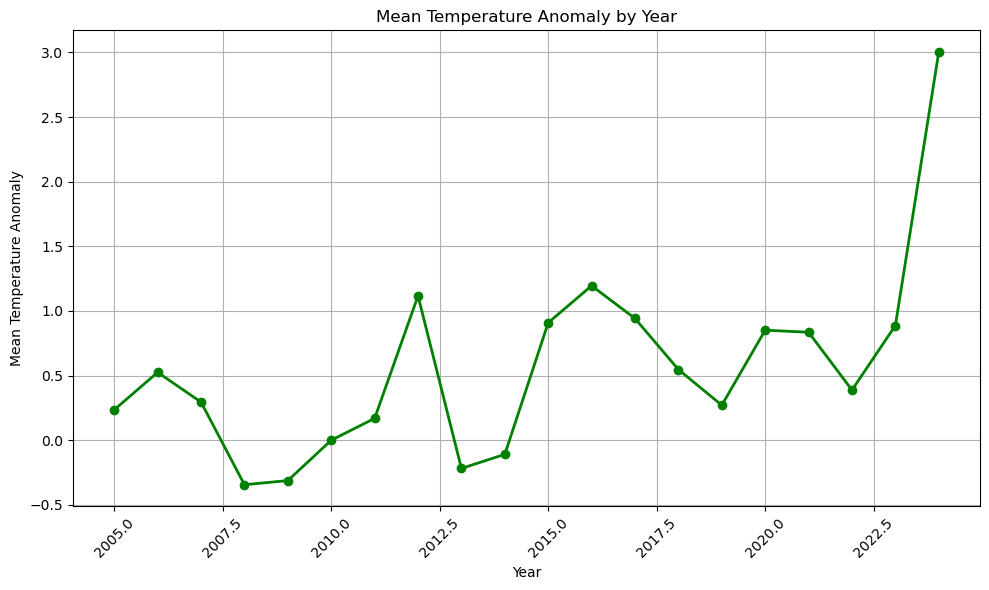

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data contains the merged dataset with temperature anomalies calculated

# Convert LST_DATE column to datetime format
merged_data['LST_DATE'] = pd.to_datetime(merged_data['LST_DATE'], format='%Y%m%d')

# Extract year from the LST_DATE column
merged_data['Year'] = merged_data['LST_DATE'].dt.year

# Calculate mean temperature anomaly for each year
mean_anomaly_by_year = merged_data.groupby('Year')['Temperature_Anomaly'].mean()

# Plotting the temperature anomalies by year using a line plot
plt.figure(figsize=(10, 6))
mean_anomaly_by_year.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Mean Temperature Anomaly by Year')
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


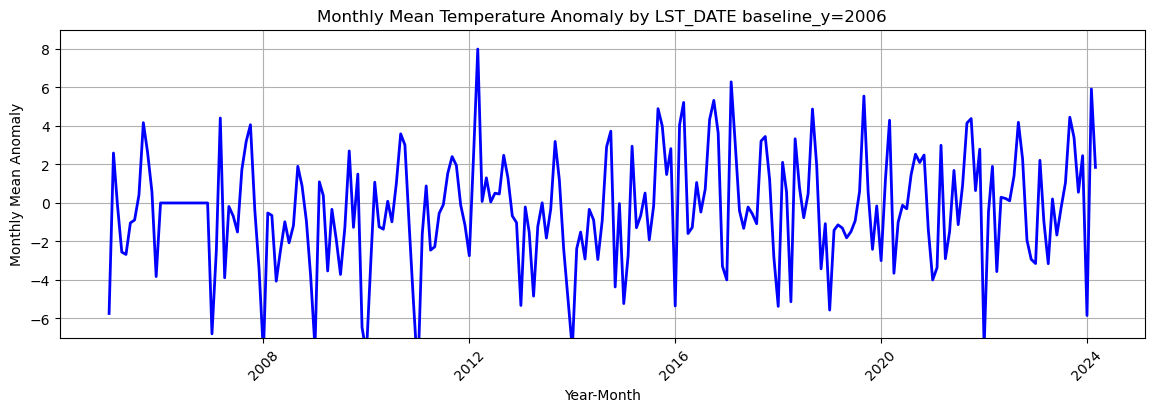

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have 'merged_data' DataFrame with 'Temperature_Anomaly' column calculated as the temperature anomaly

# Convert 'LST_DATE' column to datetime format
merged_data['LST_DATE'] = pd.to_datetime(merged_data['LST_DATE'], format='%Y%m%d')

# Filter data for January 2005 and later
merged_data = merged_data[merged_data['LST_DATE'] >= '2005-01-01']

# Monthly anomaly by LST_DATE
monthly_anomaly = merged_data.groupby([merged_data['LST_DATE'].dt.year, merged_data['LST_DATE'].dt.month])['Temperature_Anomaly'].mean()

# Create a new index combining year and month
monthly_anomaly.index = pd.to_datetime(monthly_anomaly.index.map(lambda x: '-'.join(map(str, x))), format='%Y-%m')

# Plotting monthly anomaly as a continuous line
plt.figure(figsize=(14, 4))
plt.plot(monthly_anomaly.index, monthly_anomaly.values *1.8, linestyle='-', color='blue', linewidth=2)  # Thicker line
plt.xlabel('Year-Month')
plt.ylabel('Monthly Mean Anomaly')
plt.title('Monthly Mean Temperature Anomaly by LST_DATE baseline_y='+str(by))
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True)
plt.ylim(-7, 9)  # Set y-axis limits
plt.show()


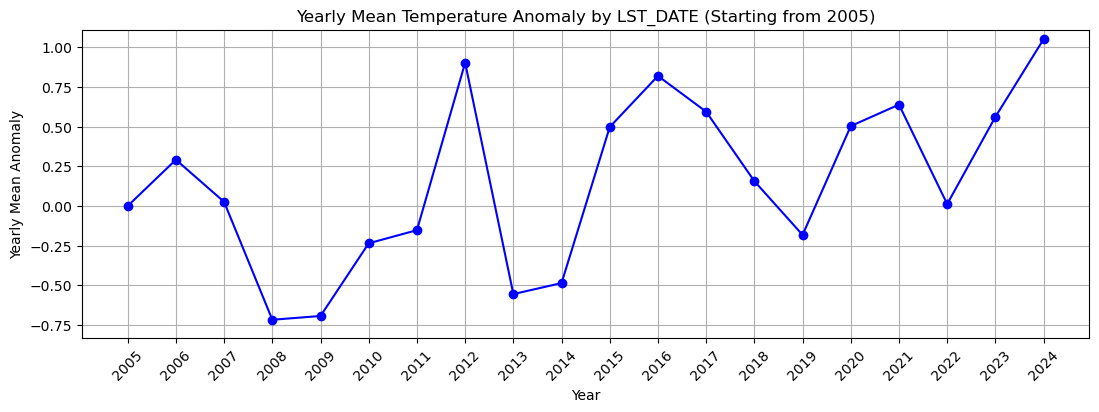

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have 'merged_data' DataFrame with 'Temperature_Anomaly' column calculated as the temperature anomaly

# Convert 'LST_DATE' column to datetime format
merged_data['LST_DATE'] = pd.to_datetime(merged_data['LST_DATE'], format='%Y%m%d')

# Filter data starting from 2005
merged_data = merged_data[merged_data['LST_DATE'].dt.year >= 2005]

# Yearly mean anomaly by LST_DATE
yearly_mean_anomaly = merged_data.groupby(merged_data['LST_DATE'].dt.year)['Temperature_Anomaly'].mean()

# Plotting yearly mean anomaly with tick lines on the y-axis
plt.figure(figsize=(13, 4))
plt.plot(yearly_mean_anomaly.index, yearly_mean_anomaly.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Yearly Mean Anomaly')
plt.title('Yearly Mean Temperature Anomaly by LST_DATE (Starting from 2005)')
plt.xticks(yearly_mean_anomaly.index)  # Set x-axis ticks to full years
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(True)
plt.ylim(-0.83, 1.11)  # Set y-axis limits
plt.show()


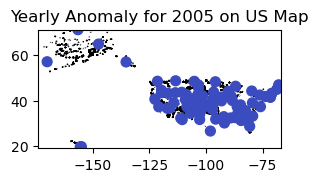

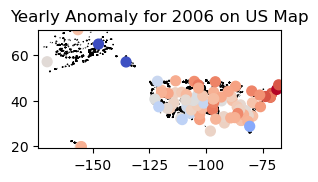

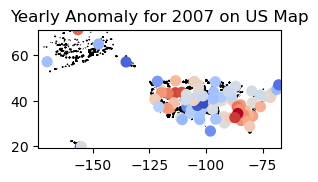

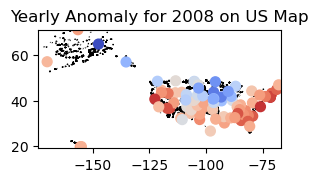

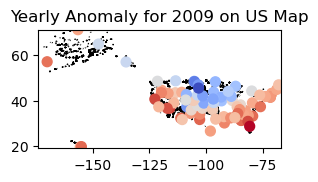

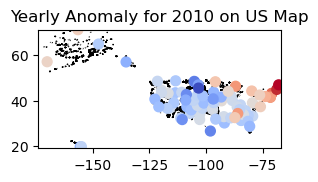

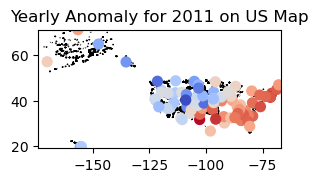

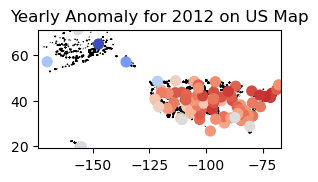

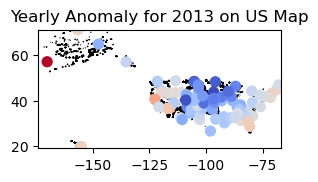

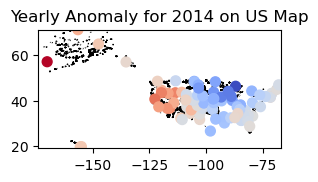

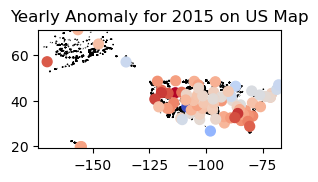

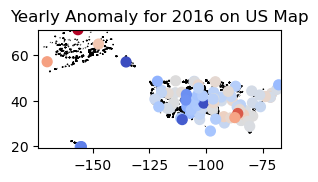

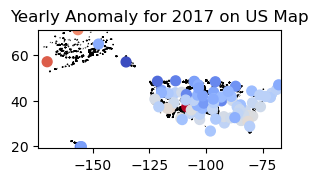

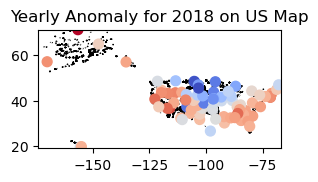

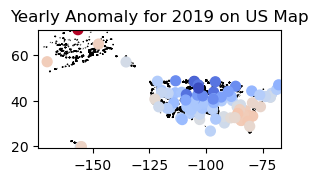

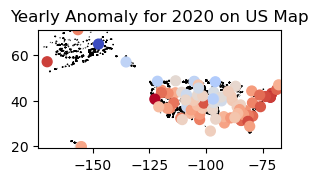

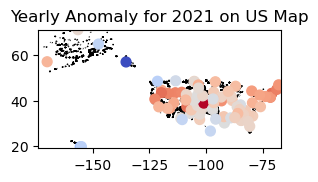

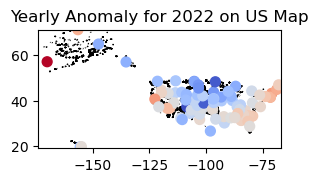

In [142]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming you have 'merged_data' DataFrame with 'Temperature_Anomaly' column calculated as the temperature anomaly
# Also, let's assume 'merged_data' has 'LONGITUDE', 'LATITUDE', and 'LST_DATE' columns

# Read the US map shapefile (You need to have the shapefile for the US map)
us_map = gpd.read_file('Downloads/cb_2018_us_aiannh_500k/cb_2018_us_aiannh_500k.shp')

# Iterate over each year to create maps
years_to_plot = range(2005,2023)

for year in years_to_plot:
    # Filter data for the specific year
    data_year = merged_data[merged_data['LST_DATE'].dt.year == year]

    # Group by station and calculate mean anomaly for the specific year
    station_anomaly_year = data_year.groupby(['WBANNO', 'LONGITUDE', 'LATITUDE'])['Temperature_Anomaly'].mean().reset_index()

    # Create a GeoDataFrame from station data
    stations_geo = gpd.GeoDataFrame(
        station_anomaly_year, 
        geometry=gpd.points_from_xy(station_anomaly_year.LONGITUDE, station_anomaly_year.LATITUDE)
    )

    # Plotting US map with station anomalies for the specific year
    fig, ax = plt.subplots(figsize=(3, 3))

    # Plotting the US map
    us_map.plot(ax=ax, color='lightgrey', edgecolor='black')

    # Plotting stations with anomalies on the map, color based on anomaly value
    stations_plot = stations_geo.plot(ax=ax, marker='o', column='Temperature_Anomaly', cmap='coolwarm', markersize=50, legend=False)

    # Set axes extent to cover the entire US map
    ax.set_xlim(us_map.bounds['minx'].min(), us_map.bounds['maxx'].max())
    ax.set_ylim(us_map.bounds['miny'].min(), us_map.bounds['maxy'].max())

    plt.title(f'Yearly Anomaly for {year} on US Map')
    plt.tight_layout()
    plt.show()


In [143]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

# Assuming you have 'merged_data' DataFrame with 'Temperature_Anomaly' column calculated as the temperature anomaly
# Also, let's assume 'merged_data' has 'LONGITUDE', 'LATITUDE', and 'LST_DATE' columns

# Read the US map shapefile (You need to have the shapefile for the US map)
us_map = gpd.read_file('Downloads/cb_2018_us_aiannh_500k/cb_2018_us_aiannh_500k.shp')

# Iterate over each year to create maps
years_to_plot = range(2005, 2023)
images = []

for year in years_to_plot:
    # Filter data for the specific year
    data_year = merged_data[merged_data['LST_DATE'].dt.year == year]

    # Group by station and calculate mean anomaly for the specific year
    station_anomaly_year = data_year.groupby(['WBANNO', 'LONGITUDE', 'LATITUDE'])['Temperature_Anomaly'].mean().reset_index()

    # Create a GeoDataFrame from station data
    stations_geo = gpd.GeoDataFrame(
        station_anomaly_year, 
        geometry=gpd.points_from_xy(station_anomaly_year.LONGITUDE, station_anomaly_year.LATITUDE)
    )

    # Plotting US map with station anomalies for the specific year
    fig, ax = plt.subplots(figsize=(3, 3))

    # Plotting the US map
    us_map.plot(ax=ax, color='lightgrey', edgecolor='black')

    # Plotting stations with anomalies on the map, color based on anomaly value
    stations_geo.plot(ax=ax, marker='o', column='Temperature_Anomaly', cmap='coolwarm', markersize=50, legend=False)

    # Set axes extent to cover the entire US map
    ax.set_xlim(us_map.bounds['minx'].min(), us_map.bounds['maxx'].max())
    ax.set_ylim(us_map.bounds['miny'].min(), us_map.bounds['maxy'].max())

    plt.title(f'Yearly Anomaly for {year} on US Map')
    plt.tight_layout()

    # Save the plot as an image
    img_path = f'anomaly_{year}.png'
    plt.savefig(img_path)
    plt.close()  # Close the figure to avoid displaying individual plots
    images.append(img_path)

# Combine images into an animated GIF
frames = [Image.open(img) for img in images]
frames[0].save('anomaly_animation.gif', format='GIF', append_images=frames[1:], save_all=True, duration=500, loop=0)
print("")

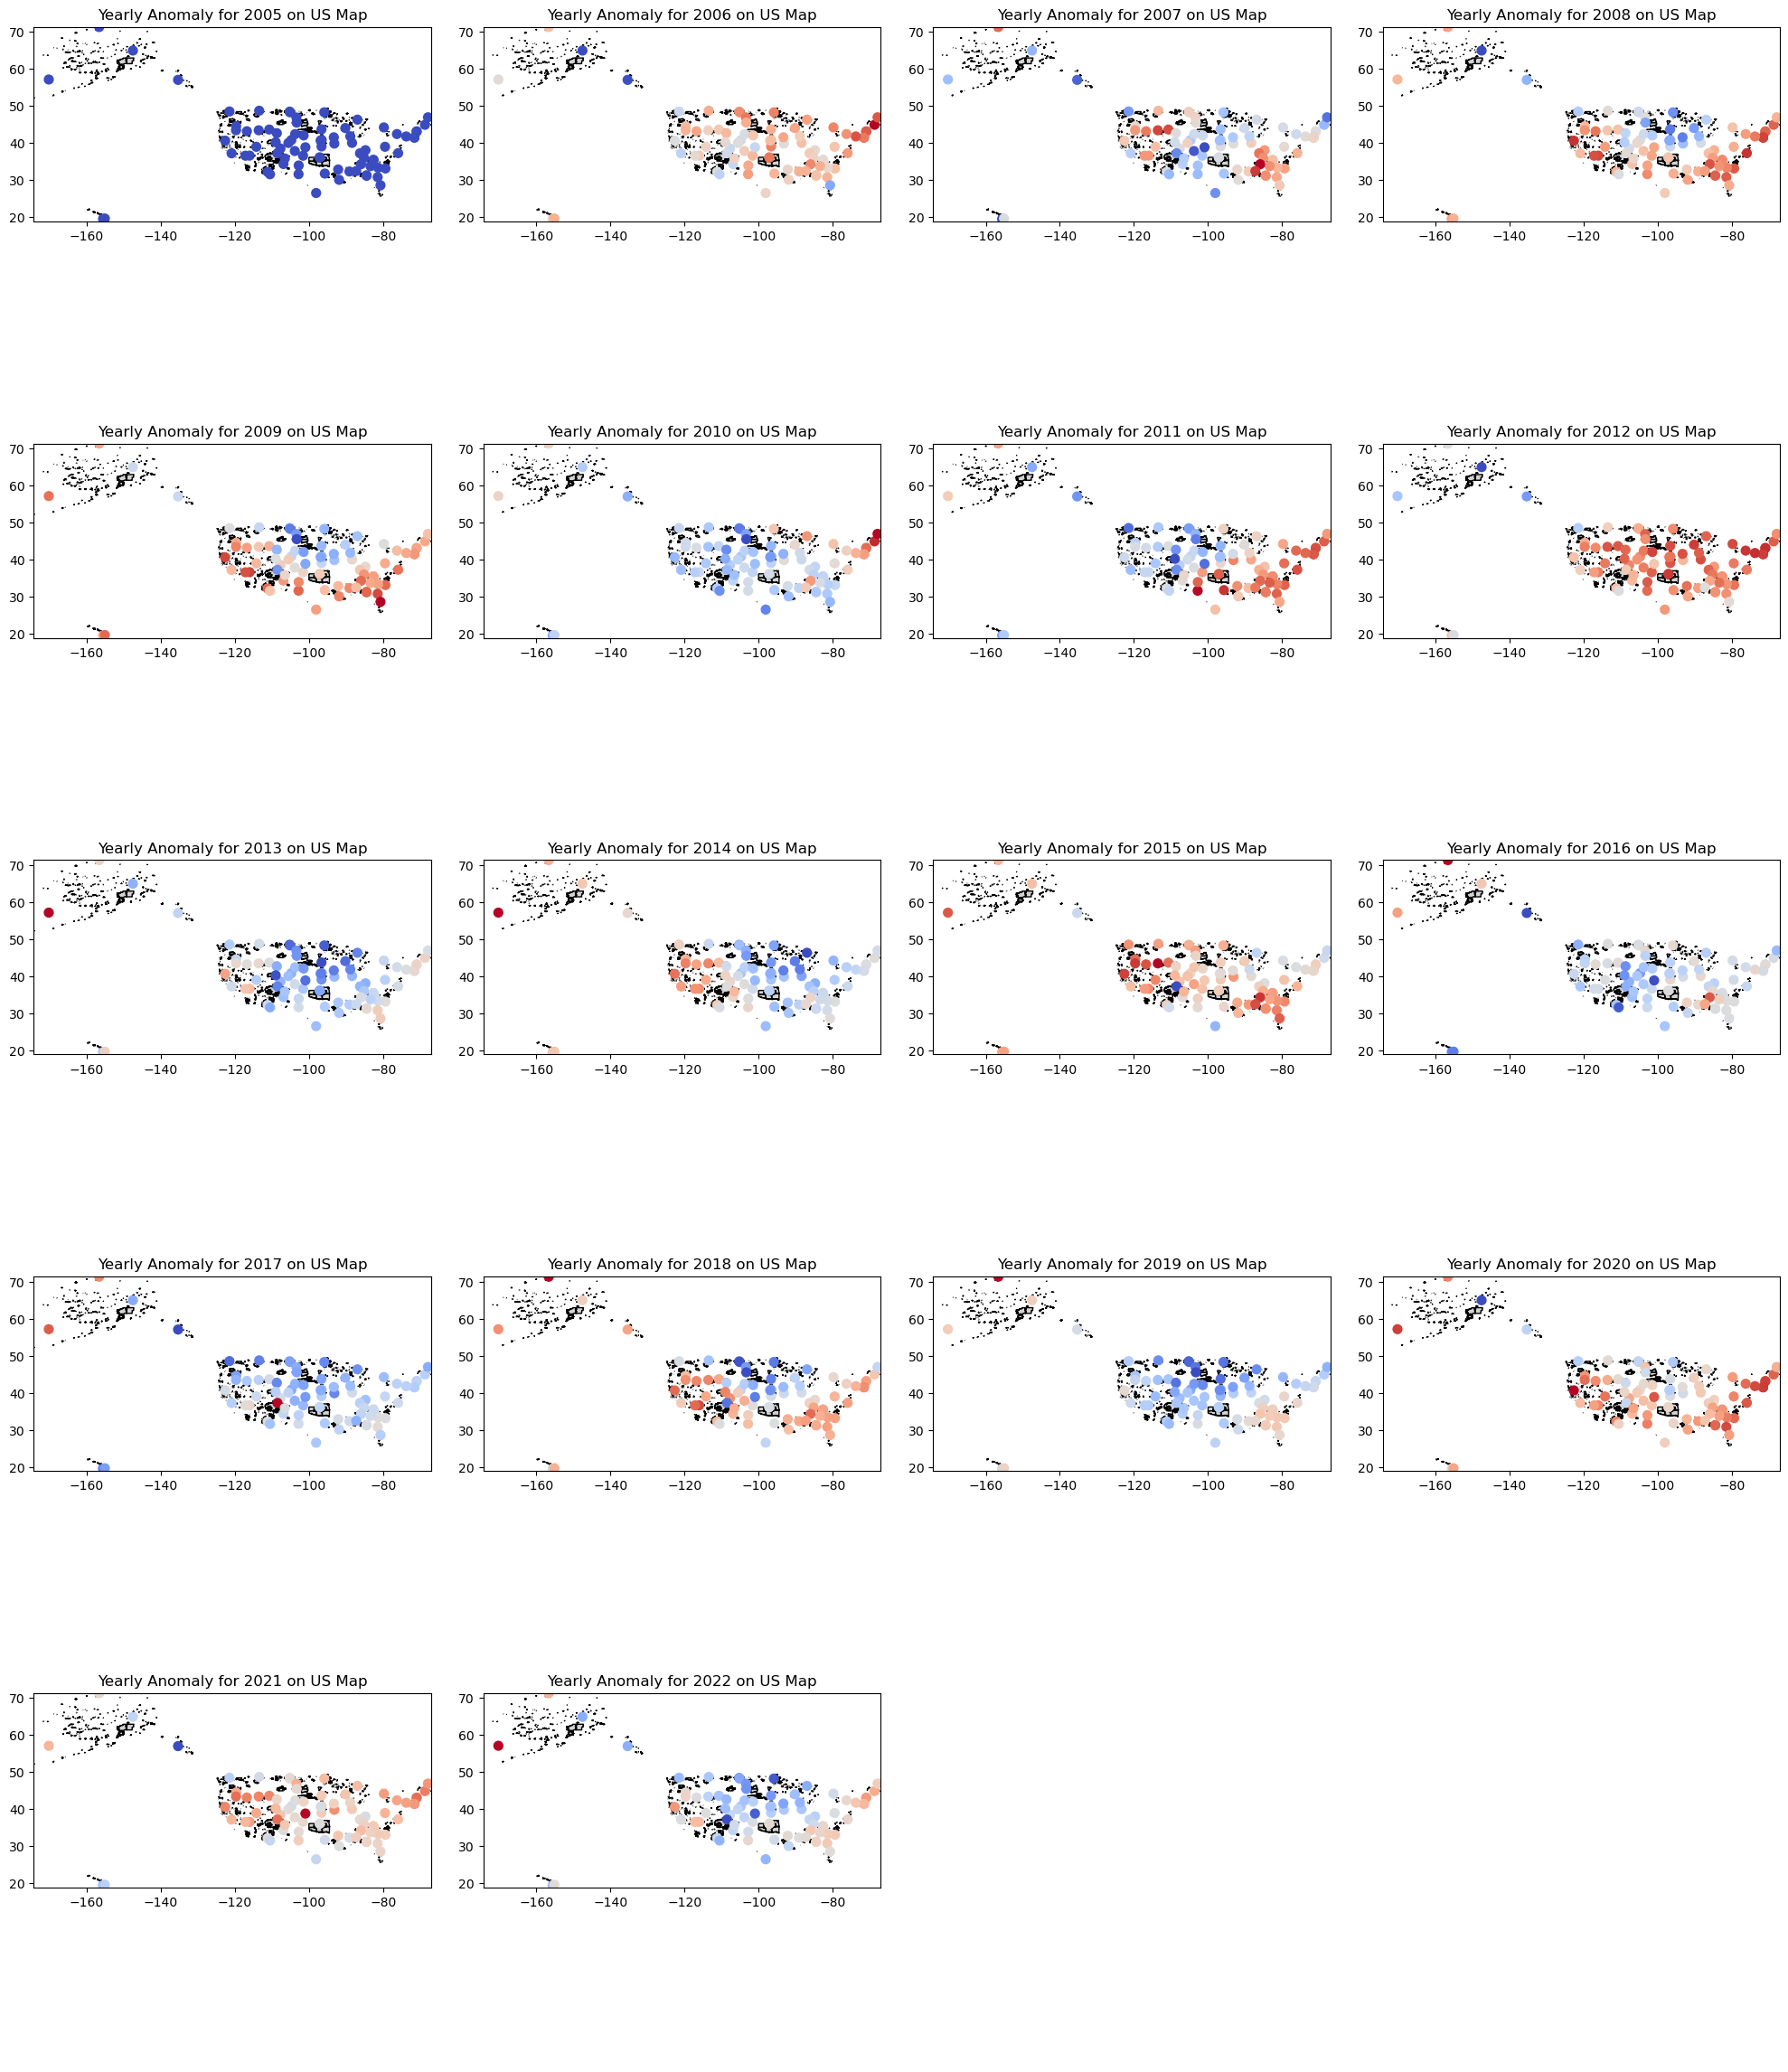

In [144]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming you have 'merged_data' DataFrame with 'Temperature_Anomaly' column calculated as the temperature anomaly
# Also, let's assume 'merged_data' has 'LONGITUDE', 'LATITUDE', and 'LST_DATE' columns

# Read the US map shapefile (You need to have the shapefile for the US map)
us_map = gpd.read_file('Downloads/cb_2018_us_aiannh_500k/cb_2018_us_aiannh_500k.shp')

# Iterate over each year to create maps
years_to_plot = range(2005, 2023)

fig, axs = plt.subplots(len(years_to_plot) // 4 + 1, 4, figsize=(20, 5 * (len(years_to_plot) // 4 + 1)))
axs = axs.ravel()

for idx, year in enumerate(years_to_plot, start=1):
    # Filter data for the specific year
    data_year = merged_data[merged_data['LST_DATE'].dt.year == year]

    # Group by station and calculate mean anomaly for the specific year
    station_anomaly_year = data_year.groupby(['WBANNO', 'LONGITUDE', 'LATITUDE'])['Temperature_Anomaly'].mean().reset_index()

    # Create a GeoDataFrame from station data
    stations_geo = gpd.GeoDataFrame(
        station_anomaly_year, 
        geometry=gpd.points_from_xy(station_anomaly_year.LONGITUDE, station_anomaly_year.LATITUDE)
    )

    # Plotting US map with station anomalies for the specific year
    ax = axs[idx - 1]

    # Plotting the US map
    us_map.plot(ax=ax, color='lightgrey', edgecolor='black')

    # Plotting stations with anomalies on the map, color based on anomaly value
    stations_geo.plot(ax=ax, marker='o', column='Temperature_Anomaly', cmap='coolwarm', markersize=50, legend=False)

    # Set axes extent to cover the entire US map
    ax.set_xlim(us_map.bounds['minx'].min(), us_map.bounds['maxx'].max())
    ax.set_ylim(us_map.bounds['miny'].min(), us_map.bounds['maxy'].max())

    ax.set_title(f'Yearly Anomaly for {year} on US Map')
    plt.tight_layout()

# Hide empty subplots
for i in range(len(years_to_plot), len(axs)):
    axs[i].axis('off')

plt.show()


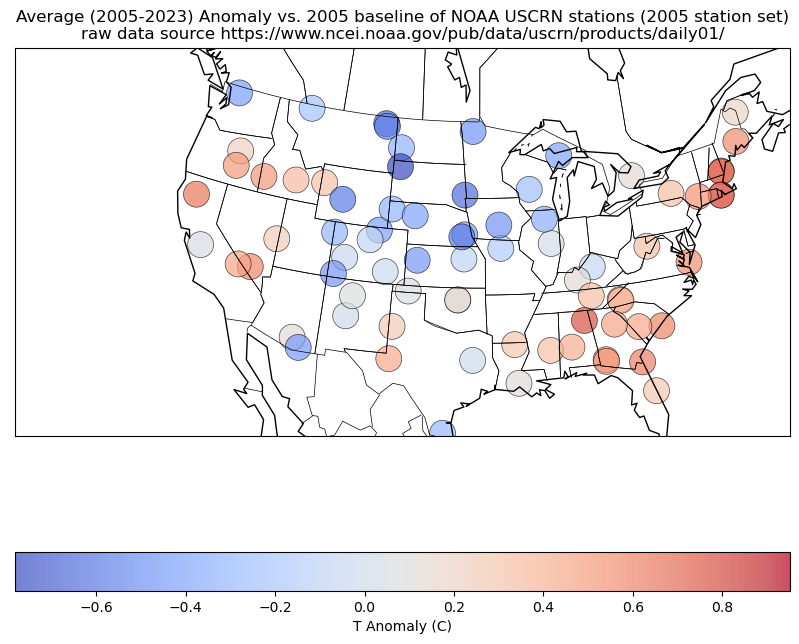

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Assuming you have 'merged_data' DataFrame with 'Temperature_Anomaly' column calculated as the temperature anomaly
# Also, let's assume 'merged_data' has 'LONGITUDE', 'LATITUDE', and 'LST_DATE' columns

# Filter data for the range 2005-2023
data_range = merged_data[(merged_data['LST_DATE'].dt.year >= 2005) & (merged_data['LST_DATE'].dt.year <= 2023)]

# Group by station and calculate mean anomaly for the entire range
overall_anomaly = data_range.groupby(['WBANNO', 'LONGITUDE', 'LATITUDE'])['Temperature_Anomaly'].mean().reset_index()

# Create a figure and Basemap object
plt.figure(figsize=(10, 10))
m = Basemap(llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=50, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

# Draw coastlines, states, and countries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Convert longitudes and latitudes to map coordinates
x, y = m(overall_anomaly['LONGITUDE'].values, overall_anomaly['LATITUDE'].values)

# Normalize anomaly values for colormap
norm = plt.Normalize(overall_anomaly['Temperature_Anomaly'].min(), overall_anomaly['Temperature_Anomaly'].max())
cmap = plt.cm.get_cmap('coolwarm')  # Choose a colormap

# Plotting stations with color-coded anomaly on the map
sc = plt.scatter(x, y, c=overall_anomaly['Temperature_Anomaly'], cmap=cmap, s=350, edgecolors='k', linewidth=0.5, alpha=0.7)
cbar = plt.colorbar(sc, orientation='horizontal', label='T Anomaly (C)')

plt.title('Average (2005-2023) Anomaly vs. 2005 baseline of NOAA USCRN stations (2005 station set)\nraw data source https://www.ncei.noaa.gov/pub/data/uscrn/products/daily01/')
plt.show()


KeyboardInterrupt: 

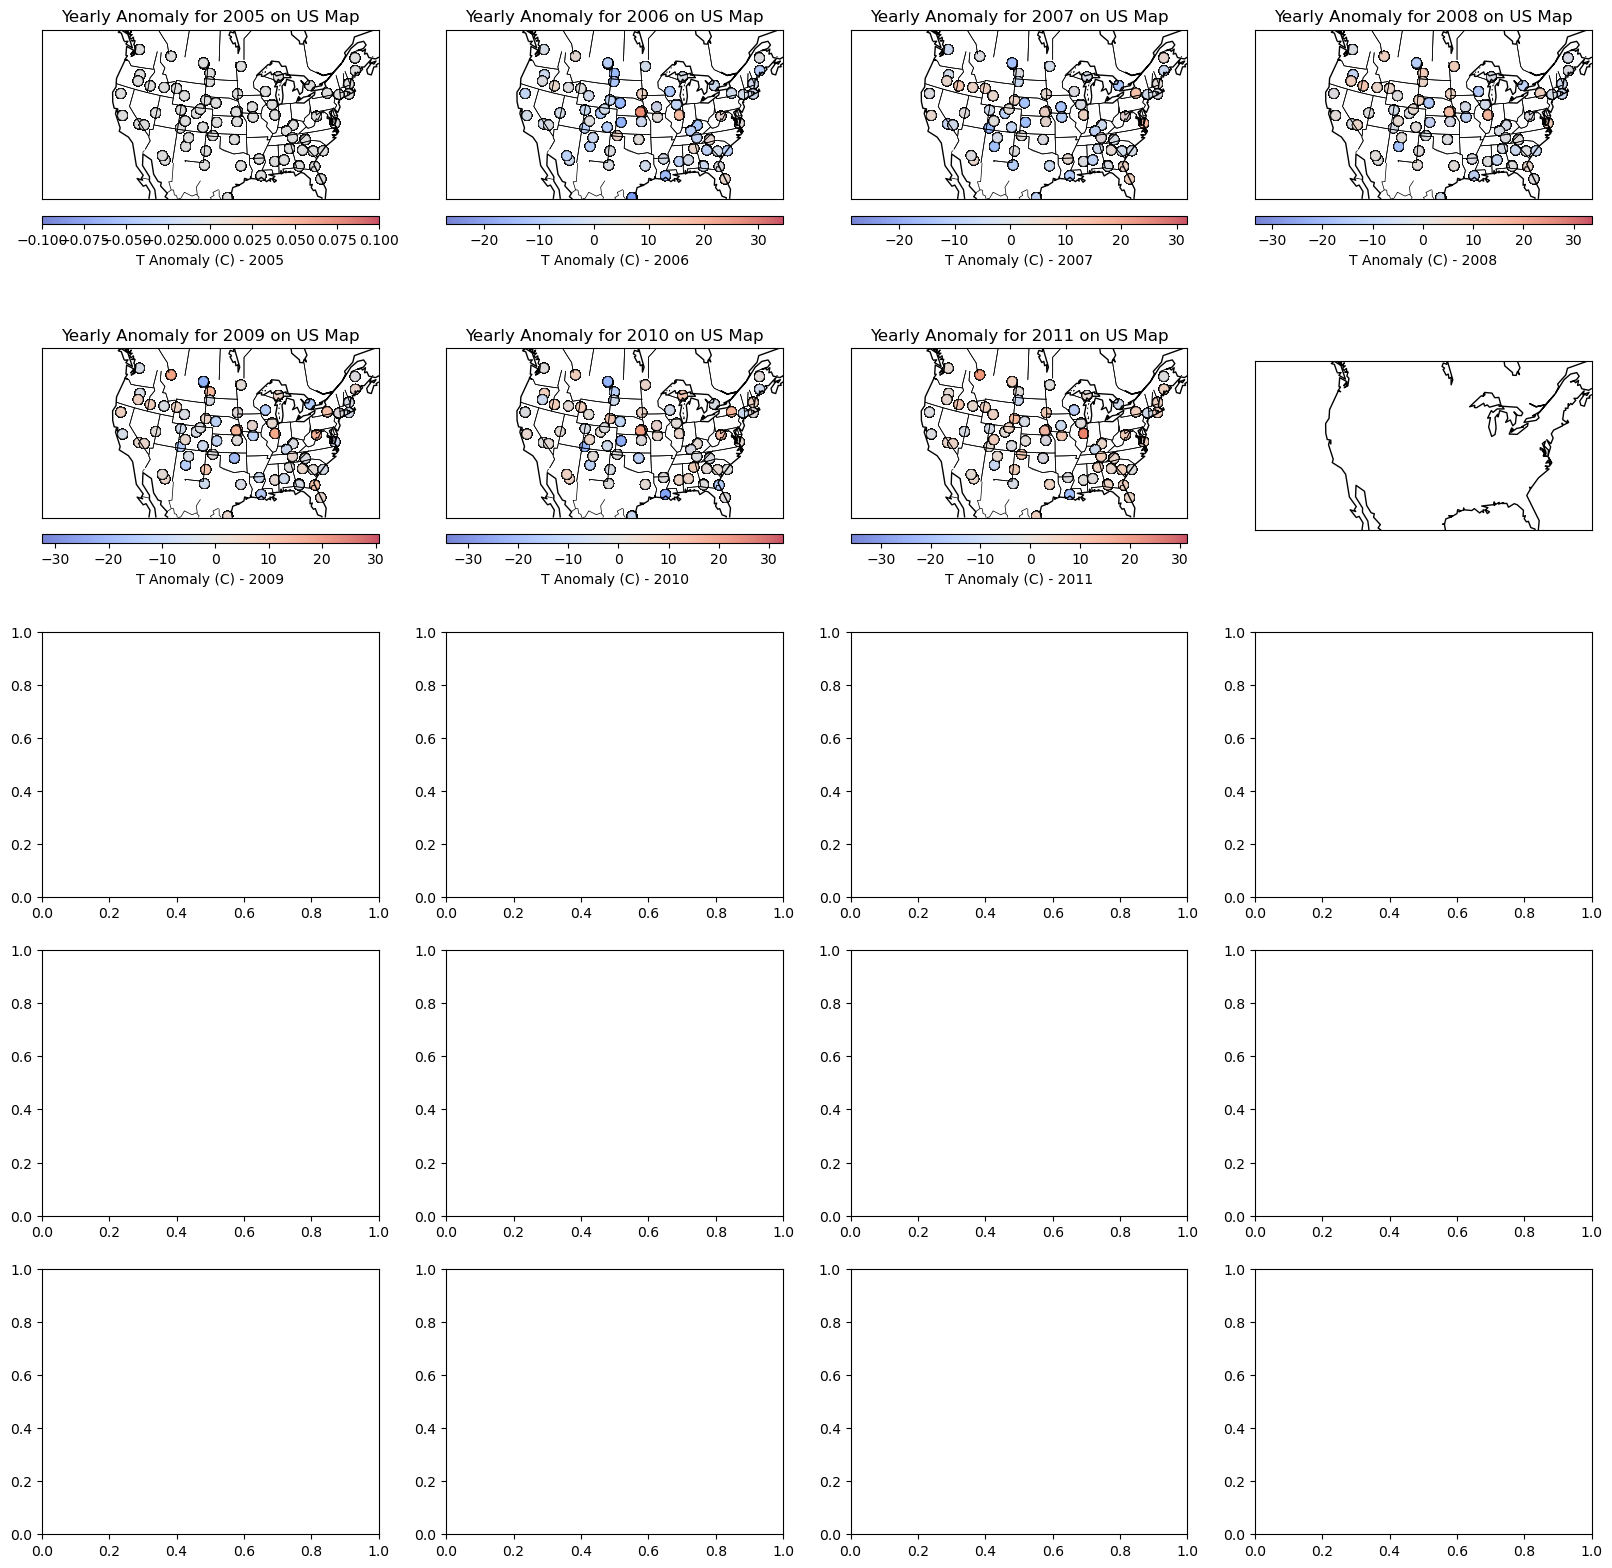

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Assuming you have 'merged_data' DataFrame with 'Temperature_Anomaly', 'LONGITUDE', 'LATITUDE', and 'LST_DATE' columns

# Create a figure and axes for subplots
fig, axs = plt.subplots(5, 4, figsize=(20, 20))

for year, ax in zip(range(2005, 2023), axs.flatten()):
    # Filter data for the specific year
    data_year = merged_data[merged_data['LST_DATE'].dt.year == year]

    # Create a Basemap for the US
    us_map = Basemap(ax=ax, llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=50, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)
    us_map.drawcoastlines()
    us_map.drawstates()

    # Convert longitudes and latitudes to map coordinates
    x, y = us_map(data_year['LONGITUDE'].values, data_year['LATITUDE'].values)

    # Normalize anomaly values for colormap
    norm = plt.Normalize(data_year['Temperature_Anomaly'].min(), data_year['Temperature_Anomaly'].max())
    cmap = plt.cm.get_cmap('coolwarm')

    # Plotting stations with color-coded anomaly on the map
    sc = us_map.scatter(x, y, c=data_year['Temperature_Anomaly'], cmap=cmap, s=50, edgecolors='k', linewidth=0.5, alpha=0.7)
    cbar = us_map.colorbar(sc, location='bottom', pad="10%")
    cbar.set_label(f'T Anomaly (C) - {year}')

    ax.set_title(f'Yearly Anomaly for {year} on US Map')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde
import numpy as np

# Assuming you have 'merged_data' DataFrame with 'Temperature_Anomaly' column calculated as the temperature anomaly
# Also, let's assume 'merged_data' has 'LONGITUDE', 'LATITUDE', and 'LST_DATE' columns

# Filter data for the range 2005-2023
data_range = merged_data[(merged_data['LST_DATE'].dt.year >= 2005) & (merged_data['LST_DATE'].dt.year <= 2023)]

# Group by station and calculate mean anomaly for the entire range
overall_anomaly = data_range.groupby(['WBANNO', 'LONGITUDE', 'LATITUDE'])['Temperature_Anomaly'].mean().reset_index()

# Create a figure and Basemap object
plt.figure(figsize=(10, 10))
m = Basemap(llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=50, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

# Draw coastlines, states, and countries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Convert longitudes and latitudes to map coordinates
x, y = m(overall_anomaly['LONGITUDE'].values, overall_anomaly['LATITUDE'].values)

# Calculate 2D Kernel Density Estimation
kde = gaussian_kde((x, y))
xi, yi = np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))

# Plotting density plot on the map
m.contourf(xi, yi, zi.reshape(xi.shape), cmap='Reds', alpha=0.5)

plt.title('Overall Anomaly Density from 2005 to 2023 on US Map')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Assuming you have 'merged_data' DataFrame with 'Temperature_Anomaly', 'LONGITUDE', 'LATITUDE', and 'LST_DATE' columns

# Filter data for the range 2005-2023
data_range = merged_data[(merged_data['LST_DATE'].dt.year >= 2005) & (merged_data['LST_DATE'].dt.year <= 2023)]

# Group by station and calculate mean anomaly for the entire range
overall_anomaly = data_range.groupby(['WBANNO', 'LONGITUDE', 'LATITUDE'])['Temperature_Anomaly'].mean().reset_index()

# Create a figure and Basemap object
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
axes = axes.flatten()

for i, year in enumerate(range(2005, 2024)):
    # Filter data for the specific year
    data_year = overall_anomaly[overall_anomaly['LST_DATE'].dt.year == year]

    # Create a Basemap object for the specific subplot
    m = Basemap(ax=axes[i], llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=50, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()

    # Convert longitudes and latitudes to map coordinates
    x, y = m(data_year['LONGITUDE'].values, data_year['LATITUDE'].values)

    # Normalize anomaly values for colormap
    norm = plt.Normalize(data_year['Temperature_Anomaly'].min(), data_year['Temperature_Anomaly'].max())
    cmap = plt.cm.get_cmap('coolwarm')

    # Plotting stations with color-coded anomaly on the map
    sc = m.scatter(x, y, c=data_year['Temperature_Anomaly'], cmap=cmap, s=350, edgecolors='k', linewidth=0.5, alpha=0.7, norm=norm)
    cbar = m.colorbar(sc, location='bottom', pad="10%")
    cbar.set_label(f'T Anomaly (C) - {year}')

    axes[i].set_title(f'Year: {year}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [147]:
import geopandas as gpd
from shapely.geometry import Point

# Load the state shapefile
states = gpd.read_file('Downloads/States_shapefile-shp/states_shapefile.shp')

# Assuming merged_data has 'LONGITUDE' and 'LATITUDE' columns
merged_data['geometry'] = [Point(xy) for xy in zip(merged_data['LONGITUDE'], merged_data['LATITUDE'])]
gdf = gpd.GeoDataFrame(merged_data, geometry='geometry')

# Set CRS for the GeoDataFrame
gdf.crs = "EPSG:4326"

# Perform a spatial join to associate points with states
merged_data = gpd.sjoin(gdf, states, how='left', op='within')
print(merged_data)



C:\Users\Administrator\miniconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


        WBANNO   LST_DATE  CRX_VN  LONGITUDE  LATITUDE  T_DAILY_MAX  \
3        26494 2005-08-10   1.201    -147.51     64.97         27.6   
4        26494 2006-08-10   1.201    -147.51     64.97         15.7   
5        26494 2007-08-10   1.301    -147.51     64.97         20.9   
6        26494 2008-08-10   1.302    -147.51     64.97         10.9   
7        26494 2009-08-10   1.302    -147.51     64.97         13.4   
...        ...        ...     ...        ...       ...          ...   
564582    4131 2019-06-30   2.623    -110.71     43.66         26.0   
564583    4131 2020-06-30   2.623    -110.71     43.66         10.6   
564584    4131 2021-06-30   2.623    -110.71     43.66         29.2   
564585    4131 2022-06-30   2.623    -110.71     43.66         25.0   
564586    4131 2023-06-30   2.623    -110.71     43.66         23.7   

        T_DAILY_MIN  T_DAILY_MEAN  T_DAILY_AVG  P_DAILY_CALC  ...  \
3              13.7          20.7         20.5           0.2  ...   
4        

In [ ]:
import pandas as pd

# Read the contents of the file into a DataFrame
with open('DNCGOP.txt', 'r') as file:
    lines = file.readlines()

# Process the lines to create a DataFrame
data = [line.strip().split(',') for line in lines[1:]]
df_political_affiliation = pd.DataFrame(data, columns=['State_Name', 'Red or Blue'])


In [ ]:
# Convert 'State_Name' column in both DataFrames to lowercase for better matching
merged_data['State_Name'] = merged_data['State_Name'].str.lower()
df_political_affiliation['State_Name'] = df_political_affiliation['State_Name'].str.lower()

# Merge results and df_political_affiliation DataFrames
merged_data = pd.merge(merged_data, df_political_affiliation, on='State_Name', how='left')

# Create separate DataFrames for GOP, DNC, and Swing States
gop_data = merged_data[merged_data['Red or Blue'] == 'Republican']
dnc_data = merged_data[merged_data['Red or Blue'] == 'Democrat']
swing_data = merged_data[merged_data['Red or Blue'] == 'Swing State']

# Plot temperature anomaly by year for GOP, DNC, and Swing States
plt.figure(figsize=(10, 6))

# GOP
for state, data in gop_data.groupby('State_Name'):
    plt.plot(data['LST_DATE'], data['Temperature_Anomaly'], label=state.capitalize() + ' (GOP)')

# DNC
for state, data in dnc_data.groupby('State_Name'):
    plt.plot(data['LST_DATE'], data['Temperature_Anomaly'], label=state.capitalize() + ' (DNC)')

# Swing States
for state, data in swing_data.groupby('State_Name'):
    plt.plot(data['LST_DATE'], data['Temperature_Anomaly'], label=state.capitalize() + ' (Swing)')

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly by Year for GOP, DNC, and Swing States')
plt.legend()
plt.show()


In [ ]:
# Grouping data by 'Red or Blue' and 'LST_DATE' to aggregate temperature anomaly
grouped_data = merged_data.groupby(['Red or Blue', merged_data['LST_DATE'].dt.year])

# Create empty dictionaries to store aggregated anomalies for GOP, DNC, and Swing
aggregated_data = {'Republican': {}, 'Democrat': {}, 'Swing State': {}}

# Aggregate temperature anomaly by year for GOP, DNC, and Swing States
for (party, year), data in grouped_data:
    if party == 'Republican':
        if year not in aggregated_data['Republican']:
            aggregated_data['Republican'][year] = data['Temperature_Anomaly'].mean()
    elif party == 'Democrat':
        if year not in aggregated_data['Democrat']:
            aggregated_data['Democrat'][year] = data['Temperature_Anomaly'].mean()
    else:
        if year not in aggregated_data['Swing State']:
            aggregated_data['Swing State'][year] = data['Temperature_Anomaly'].mean()

# Plotting aggregated temperature anomaly by year for GOP, DNC, and Swing States
plt.figure(figsize=(10, 6))

for party, data in aggregated_data.items():
    plt.plot(list(data.keys()), list(data.values()), label=party)

plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly')
plt.title('Mean Temperature Anomaly by Year for GOP, DNC, and Swing States')
plt.legend()
plt.show()

In [ ]:
# Grouping data by 'Red or Blue' and 'LST_DATE' to aggregate temperature anomaly
grouped_data = merged_data.groupby(['Red or Blue', merged_data['LST_DATE'].dt.year])

# Create empty dictionaries to store aggregated anomalies for Republican and DNC/Swing combined
aggregated_data = {'Republican': {}, 'DNC/Swing': {}}

# Aggregate temperature anomaly by year for Republican and DNC/Swing combined
for (party, year), data in grouped_data:
    if party == 'Republican':
        if year not in aggregated_data['Republican']:
            aggregated_data['Republican'][year] = data['Temperature_Anomaly'].mean()
    else:
        if year not in aggregated_data['DNC/Swing']:
            if year in aggregated_data['DNC/Swing']:
                aggregated_data['DNC/Swing'][year] += data['Temperature_Anomaly'].mean()
            else:
                aggregated_data['DNC/Swing'][year] = data['Temperature_Anomaly'].mean()

# Plotting aggregated temperature anomaly by year for Republican and DNC/Swing combined
plt.figure(figsize=(10, 6))

for party, data in aggregated_data.items():
    plt.plot(list(data.keys()), list(data.values()), label=party)

plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly')
plt.title('Mean Temperature Anomaly by Year for Republican and DNC/Swing')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'merged_data' DataFrame has 'Temperature_Anomaly', 'LST_DATE', 'State_Name', and 'Red or Blue' columns
# Assuming 'df_political_affiliation' DataFrame has 'State_Name' and 'Red or Blue' columns


# Grouping data by 'Red or Blue' and 'LST_DATE' to aggregate temperature anomaly
grouped_data = merged_data.groupby(['Red or Blue', merged_data['LST_DATE'].dt.year])

# Create empty dictionaries to store aggregated anomalies for Republican and DNC/Swing combined
aggregated_data = {'Republican': {}, 'DNC/Swing': {}}

# Aggregate temperature anomaly by year for Republican and DNC/Swing combined
for (party, year), data in grouped_data:
    if party == 'Republican':
        if year not in aggregated_data['Republican']:
            aggregated_data['Republican'][year] = data['Temperature_Anomaly'].mean()
    else:
        if year not in aggregated_data['DNC/Swing']:
            if year in aggregated_data['DNC/Swing']:
                aggregated_data['DNC/Swing'][year] += data['Temperature_Anomaly'].mean()
            else:
                aggregated_data['DNC/Swing'][year] = data['Temperature_Anomaly'].mean()

# Plotting aggregated temperature anomaly by year for Republican and DNC/Swing combined with loess trend lines
plt.figure(figsize=(10, 6))

# Fit loess trend lines and plot for Republican and DNC/Swing combined
for party, data in aggregated_data.items():
    x = list(data.keys())
    y = list(data.values())
    color = 'red' if party == 'DNC/Swing' else 'blue'
    plt.plot(x, y, label=party, marker='o', color=color)

 
plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly')
plt.title('Mean Temperature Anomaly by Year for Republican and DNC/Swing ')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Grouping data by 'Red or Blue' and 'LST_DATE' to aggregate temperature anomaly
grouped_data = merged_data.groupby(['Red or Blue', merged_data['LST_DATE'].dt.year])
print (merged_data)

# Create empty dictionaries to store aggregated anomalies for Republican and DNC/Swing combined
aggregated_data = {'Republican': {}, 'DNC/Swing': {}, 'All States': {}}

# Aggregate temperature anomaly by year for Republican and DNC/Swing combined
for (party, year), data in grouped_data:
    if party == 'Republican':
        if year not in aggregated_data['Republican']:
            aggregated_data['Republican'][year] = data['Temperature_Anomaly'].mean()
    elif party in ['Democrat', 'Swing State']:
        if year not in aggregated_data['DNC/Swing']:
            if year in aggregated_data['DNC/Swing']:
                aggregated_data['DNC/Swing'][year] += data['Temperature_Anomaly'].mean()
            else:
                aggregated_data['DNC/Swing'][year] = data['Temperature_Anomaly'].mean()
    
# Aggregate temperature anomaly by year for Republican and DNC/Swing combined
for (party, year), data in grouped_data:
    if party in ['Democrat', 'Swing State', 'DNC/Swing']:
        aggregated_data['All States'][year] = data['Temperature_Anomaly'].mean()

# Plotting aggregated temperature anomaly by year for Republican, DNC/Swing, and All States
plt.figure(figsize=(10, 6))

# Fit loess trend lines and plot for Republican, DNC/Swing, and All States
for party, data in aggregated_data.items():
    x = list(data.keys())
    y = list(data.values())
    color = 'red' if party == 'DNC/Swing' else 'blue' if party == 'Republican' else 'black'
    plt.plot(x, y, label=party, marker='o', color=color)

plt.xlabel('Year')
plt.ylabel('Mean Temperature Anomaly')
plt.title('Mean Temperature Anomaly by Year for Republican, DNC/Swing, and All States')
plt.legend()
plt.show()


In [ ]:
import geopandas as gpd

# Read the shapefile containing state information
shapefile_path = 'Downloads/States_shapefile-shp/states_shapefile.shp'  # Replace with the actual path to your shapefile
states = gpd.read_file(shapefile_path)

# Display the state names
print(states['State_Name'])
import geopandas as gpd

# Read the shapefile containing state information
shapefile_path = 'Downloads/States_shapefile-shp/states_shapefile.shp'  # Replace with the actual path to your shapefile
states = gpd.read_file(shapefile_path)

# Display the state names without index
state_names = states['State_Name'].tolist()
for state in state_names:
    print(state)
